In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4
num_samples = 1280



title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)



priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])


In [9]:
text_body

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>

In [6]:
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))     
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) 
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))             
 
priority_data = np.random.random(size=(num_samples, 1))                       
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
 
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 7ms/step - loss: 21.6861 - priority_loss: 0.3310 - department_loss: 21.3551 - priority_mean_absolute_error: 0.4967 - department_accuracy: 0.0797


In [15]:
title_data[0]

array([1, 0, 0, ..., 0, 1, 1])

In [18]:
title_data.shape

(1280, 10000)

In [10]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department":
                    "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department":
                       ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 7ms/step - loss: 47.2426 - priority_loss: 0.3310 - department_loss: 46.9116 - priority_mean_absolute_error: 0.4967 - department_accuracy: 0.1375


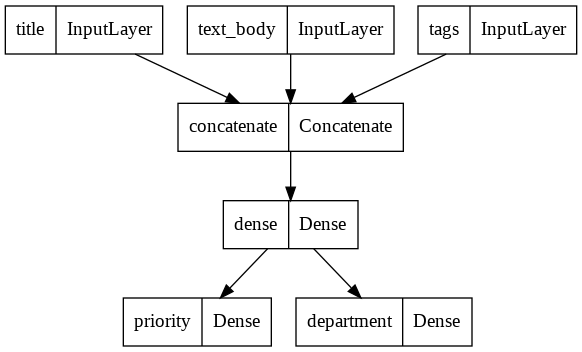

In [11]:
keras.utils.plot_model(model, "ticket_classifier.png")b

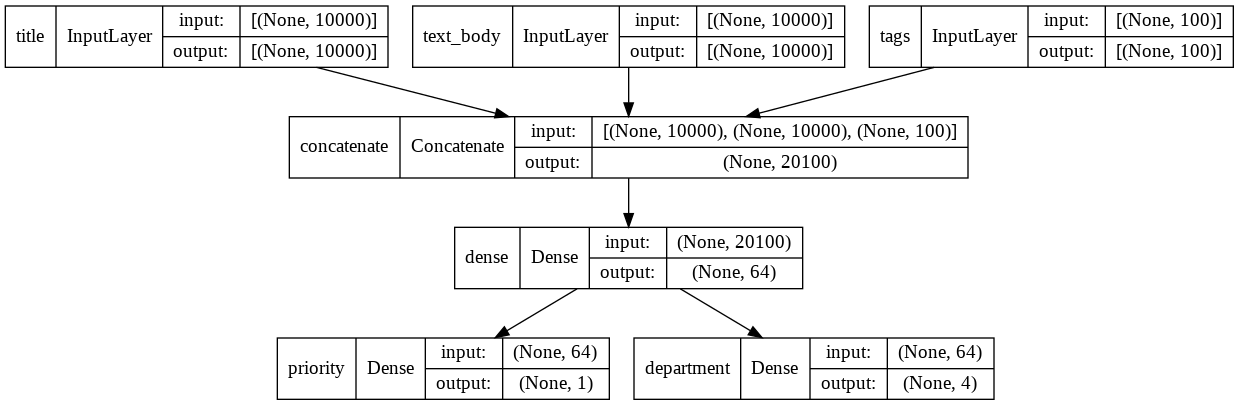

In [12]:
keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)


In [13]:
model.layers